Basic Import

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.impute import KNNImputer


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Charger le dataset

In [4]:
df = pd.read_csv("age_prediction.csv")
df.head()

,age,cg00346208,cg00764612,cg01281911,cg01931994,cg02924487,cg03054277,cg04360793,cg04400972,cg05378938,...,ch.5.432310R,ch.5.79606571R,ch.6.2925136R,ch.6.41978480R,ch.7.135065R,ch.7.2635062R,ch.7.2986028F,ch.7.3189261R,ch.8.103893680R,ch.9.1059422R
0,5.0,0.067,0.186,0.060,0.299,0.663,0.555,0.214,0.061,0.074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.077,0.079,0.047,0.233,0.608,0.391,0.089,0.070,0.070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.081,0.072,0.044,0.212,0.630,0.325,0.080,0.061,0.046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.055,0.078,0.051,0.259,0.565,0.373,0.065,0.069,0.053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,0.149,0.212,0.051,0.323,0.695,0.661,0.161,0.079,0.097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Aperçu général du dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11910 entries, 0 to 11909
Columns: 2375 entries, age to ch.9.1059422R
dtypes: float64(2375)
memory usage: 215.8 MB


Statistiques de base (Age + CpGs)

In [4]:
df.describe()

,age,cg00346208,cg00764612,cg01281911,cg01931994,cg02924487,cg03054277,cg04360793,cg04400972,cg05378938,...,ch.5.432310R,ch.5.79606571R,ch.6.2925136R,ch.6.41978480R,ch.7.135065R,ch.7.2635062R,ch.7.2986028F,ch.7.3189261R,ch.8.103893680R,ch.9.1059422R
count,11910.000000,10456.000000,11909.000000,11907.000000,11909.000000,11910.000000,11910.000000,11910.000000,11910.000000,11909.000000,...,7769.000000,7801.000000,7729.000000,7748.000000,7754.000000,7735.000000,7803.000000,7804.000000,7800.000000,7756.000000
mean,42.647664,0.159996,0.309768,0.097784,0.338882,0.727987,0.764122,0.313739,0.133636,0.201793,...,0.043650,0.134846,0.039239,0.052599,0.039361,0.030676,0.037450,0.049157,0.046183,0.052019
std,20.774521,0.065542,0.076290,0.040733,0.072915,0.066712,0.127945,0.099367,0.046920,0.089377,...,0.040125,0.042229,0.036913,0.047204,0.033590,0.030346,0.022155,0.032404,0.030353,0.044141
min,0.000000,0.009000,0.053000,0.012000,0.075000,0.150000,0.221000,0.030000,0.018000,0.016000,...,0.000000,0.011000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000
25%,21.523500,0.112000,0.270000,0.070000,0.293000,0.688000,0.700000,0.253000,0.104000,0.133000,...,0.021000,0.111000,0.019000,0.024000,0.020000,0.013000,0.028000,0.033000,0.031000,0.025000
50%,46.078000,0.156000,0.318000,0.092000,0.327000,0.728000,0.781000,0.315000,0.131000,0.193000,...,0.034000,0.133000,0.029000,0.042000,0.032000,0.024000,0.036000,0.046000,0.043000,0.042000
75%,58.281000,0.201000,0.361000,0.120000,0.370000,0.770000,0.853000,0.376000,0.161000,0.262000,...,0.049000,0.153000,0.043000,0.062000,0.044000,0.034000,0.042000,0.056000,0.053000,0.060000
max,103.000000,0.547000,0.782000,0.792000,0.834000,0.956000,0.993000,0.928000,0.704000,0.689000,...,0.402000,0.373000,0.509000,0.430000,0.329000,0.274000,0.325000,0.269000,0.349000,0.487000


In [14]:
df.skew()


age               -0.241116
cg00346208         0.519718
cg00764612        -0.872051
cg01281911         1.341529
cg01931994         1.085948
                     ...   
ch.7.2635062R      3.247285
ch.7.2986028F      2.713695
ch.7.3189261R      2.369895
ch.8.103893680R    2.379587
ch.9.1059422R      2.848061
Length: 2375, dtype: float64

In [15]:
df.kurtosis()

age                -0.784168
cg00346208          0.475391
cg00764612          1.660773
cg01281911          8.882686
cg01931994          2.165816
                     ...    
ch.7.2635062R      13.271341
ch.7.2986028F      15.608732
ch.7.3189261R       8.162434
ch.8.103893680R     8.961919
ch.9.1059422R      10.827196
Length: 2375, dtype: float64

Vérifier les valeurs manquantes (missing Value)

In [5]:
missing = df.isna().sum()
missing[missing > 0].sort_values(ascending=False)


cg24273318    4269
cg21843262    4231
cg20100998    4211
cg18285188    4194
cg11544115    4190
              ... 
cg22331349       1
cg24724506       1
cg19855470       1
cg13362112       1
cg14410016       1
Length: 2014, dtype: int64

Heatmap des valeurs manquantes (mini version)

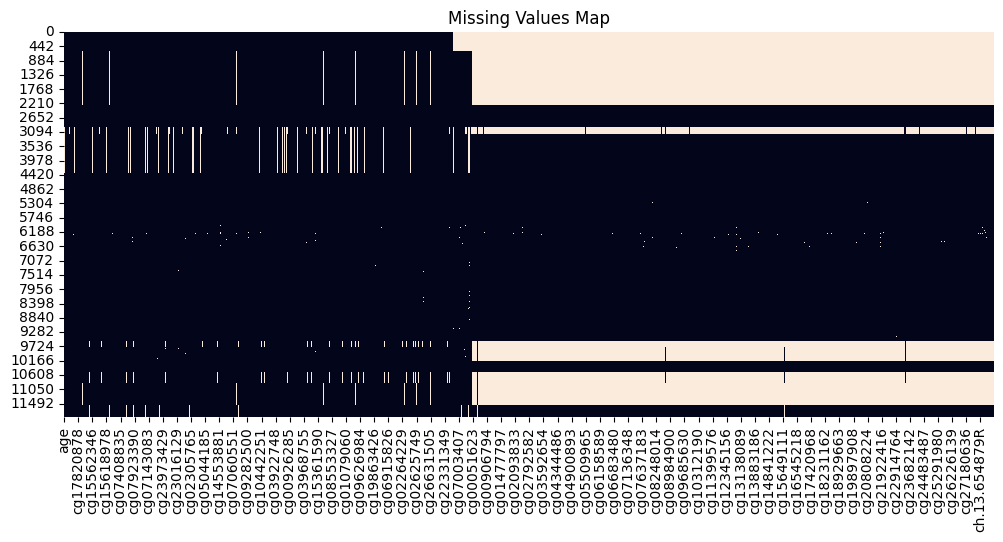

In [6]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Map")
plt.show()


Distribution de l'âge

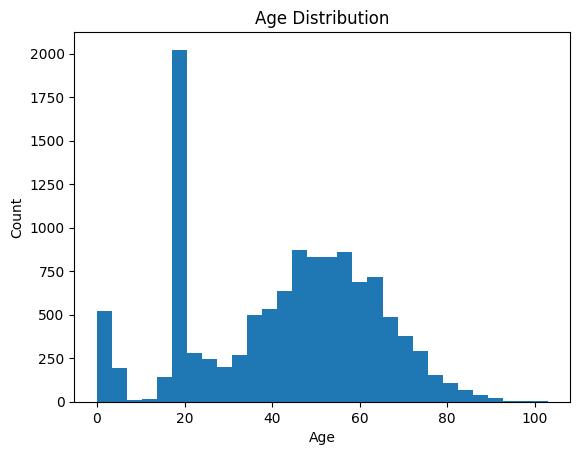

In [7]:
plt.hist(df["age"], bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()


Détection simple des outliers sur l’âge

In [8]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["age"] < Q1 - 1.5*IQR) | (df["age"] > Q3 + 1.5*IQR)]
outliers.head()


,age,cg00346208,cg00764612,cg01281911,cg01931994,cg02924487,cg03054277,cg04360793,cg04400972,cg05378938,...,ch.5.432310R,ch.5.79606571R,ch.6.2925136R,ch.6.41978480R,ch.7.135065R,ch.7.2635062R,ch.7.2986028F,ch.7.3189261R,ch.8.103893680R,ch.9.1059422R


Visualisation des outliers (Boxplot)

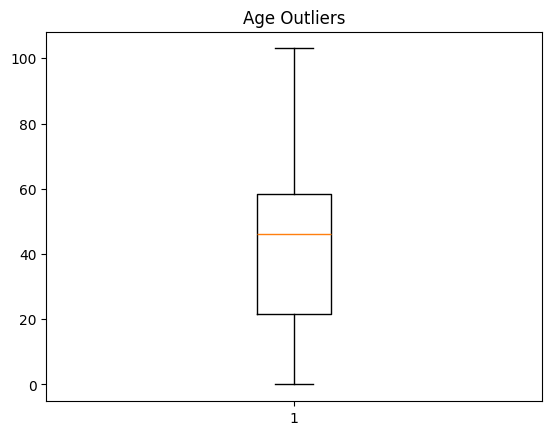

In [9]:
plt.boxplot(df["age"])
plt.title("Age Outliers")
plt.show()


Check for unrealistic ages

In [10]:
df[(df["age"] < 10) | (df["age"] > 100)]


,age,cg00346208,cg00764612,cg01281911,cg01931994,cg02924487,cg03054277,cg04360793,cg04400972,cg05378938,...,ch.5.432310R,ch.5.79606571R,ch.6.2925136R,ch.6.41978480R,ch.7.135065R,ch.7.2635062R,ch.7.2986028F,ch.7.3189261R,ch.8.103893680R,ch.9.1059422R
0,5.000,0.067,0.186,0.060,0.299,0.663,0.555,0.214,0.061,0.074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000,0.077,0.079,0.047,0.233,0.608,0.391,0.089,0.070,0.070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000,0.081,0.072,0.044,0.212,0.630,0.325,0.080,0.061,0.046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000,0.055,0.078,0.051,0.259,0.565,0.373,0.065,0.069,0.053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.000,0.149,0.212,0.051,0.323,0.695,0.661,0.161,0.079,0.097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9557,7.199,0.038,0.141,0.044,0.247,0.694,0.584,0.123,0.046,0.067,...,0.027,0.177,0.048,0.092,0.063,0.043,0.046,0.054,0.085,0.027
9561,2.500,0.042,0.178,0.026,0.277,0.694,0.516,0.190,0.062,0.053,...,0.156,0.268,0.127,0.173,0.102,0.105,0.091,0.110,0.112,0.135
9562,7.102,0.127,0.231,0.049,0.265,0.702,0.637,0.298,0.062,0.073,...,0.036,0.174,0.050,0.098,0.051,0.030,0.047,0.058,0.064,0.081
11582,0.000,0.133,0.272,0.095,0.311,0.696,0.748,0.275,0.134,0.158,...,0.143,0.245,0.090,0.200,0.131,0.117,0.108,0.143,0.150,0.178


Detect outliers for all CpG columns

In [7]:
def count_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((col < lower) | (col > upper)).sum()

outliers_per_feature = df.drop(columns=["age"]).apply(count_outliers)
outliers_per_feature.head()


cg00346208    110
cg00764612    468
cg01281911    277
cg01931994    634
cg02924487    263
dtype: int64

Show CpGs with most outliers

In [8]:
outliers_per_feature.sort_values(ascending=False).head(20)


cg02264229    1591
cg05463027    1502
cg10883735    1484
cg11063819    1434
cg09721041    1430
cg23609528    1362
cg19964475    1354
cg25198656    1342
cg01883408    1338
cg02336729    1327
cg13130526    1316
cg17475136    1298
cg07021678    1290
cg17254384    1275
cg25291980    1270
cg09685630    1260
cg03918255    1260
cg23492617    1255
cg06845634    1247
cg06532064    1246
dtype: int64

Visualize the distribution of outlier counts

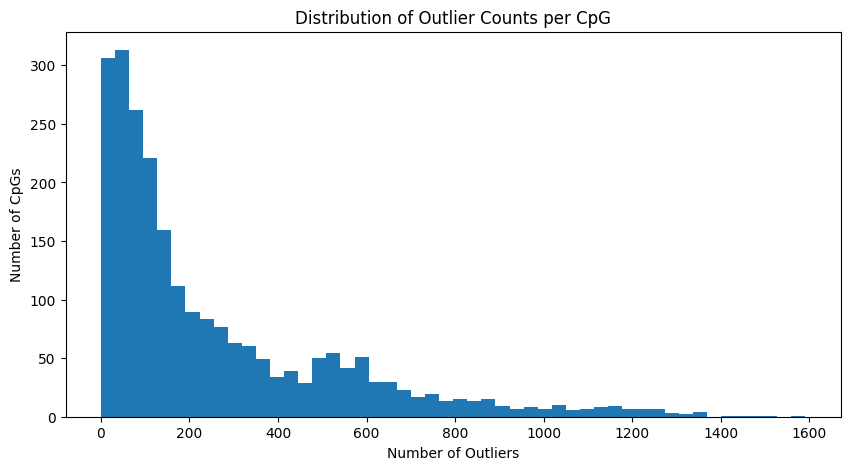

In [9]:
plt.figure(figsize=(10,5))
plt.hist(outliers_per_feature, bins=50)
plt.title("Distribution of Outlier Counts per CpG")
plt.xlabel("Number of Outliers")
plt.ylabel("Number of CpGs")
plt.show()


handle the outliers

Winsorize (cap extreme values)

In [5]:
from scipy.stats.mstats import winsorize

df_out = df.copy()

for col in df_out.columns:
    if col == "age":
        continue  # skip age

    # Winsorize trims the lower and upper 1% of values
    df_out[col] = winsorize(df_out[col], limits=[0.01, 0.01])


Handle missing values (KNN Imputation)

In [6]:
# Age column
y = df_out["age"].values.reshape(-1, 1)

# CpG features (already Winsorized)
X = df_out.drop(columns=["age"]).values

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
age_scaler = MinMaxScaler()
y_scaled = age_scaler.fit_transform(y)

Combine age + CpGs for KNN imputation

In [10]:
# Combine age (scaled) + CpGs
data_for_impute = np.hstack([y_scaled, X])

# Apply KNN
imputer = KNNImputer(n_neighbors=5, weights='distance')
data_imputed = imputer.fit_transform(data_for_impute)

Separate age and CpGs after imputation

In [11]:
# Age back to original scale
y_imputed_scaled = data_imputed[:, 0].reshape(-1,1)
y_imputed = age_scaler.inverse_transform(y_imputed_scaled)

# CpGs remain 0–1
X_imputed = data_imputed[:, 1:]

import pandas as pd

df_final = pd.DataFrame(X_imputed, columns=df_out.drop(columns=["age"]).columns)
df_final["age"] = y_imputed


Total missing values in the dataset

In [12]:
df_final.isna().sum().sum()  # should be 0 after KNN imputation

np.int64(0)

Missing values per feature

In [13]:
df_final.isna().sum().sort_values(ascending=False).head(20)

cg00346208    0
cg00764612    0
cg01281911    0
cg01931994    0
cg02924487    0
cg03054277    0
cg04360793    0
cg04400972    0
cg05378938    0
cg05888175    0
cg06619077    0
cg07366503    0
cg07996594    0
cg08139234    0
cg09036468    0
cg10501210    0
cg11411904    0
cg11980944    0
cg12764034    0
cg13300273    0
dtype: int64

Inspect dataset shape

In [14]:
df_final.shape


(11910, 2375)

Quick summary of the data

In [18]:
df_final.describe().T


,count,mean,std,min,25%,50%,75%,max
cg00346208,11910.0,0.166350,0.066862,0.042,0.116000,0.162000,0.211000,0.547
cg00764612,11910.0,0.309578,0.075557,0.070,0.270000,0.318000,0.361000,0.454
cg01281911,11910.0,0.097529,0.039079,0.024,0.070000,0.092000,0.120000,0.219
cg01931994,11910.0,0.338790,0.070925,0.204,0.293000,0.327000,0.370000,0.574
cg02924487,11910.0,0.727998,0.065481,0.553,0.688000,0.728000,0.770000,0.878
...,...,...,...,...,...,...,...,...
ch.7.2986028F,11910.0,0.040418,0.020079,0.009,0.032000,0.039000,0.044064,0.325
ch.7.3189261R,11910.0,0.052853,0.027829,0.010,0.040000,0.052203,0.060204,0.269
ch.8.103893680R,11910.0,0.050497,0.027093,0.009,0.037221,0.049000,0.057109,0.349
ch.9.1059422R,11910.0,0.058430,0.039544,0.008,0.032000,0.054621,0.070010,0.487


Visualize distributions

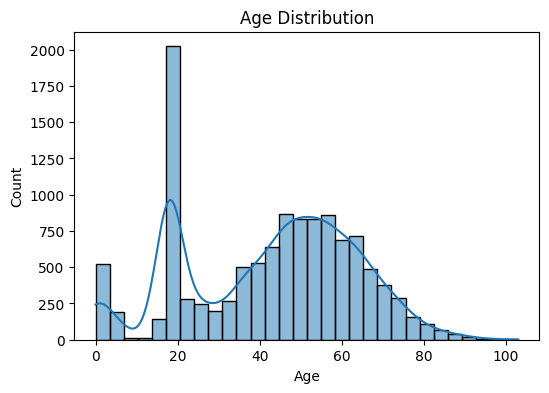

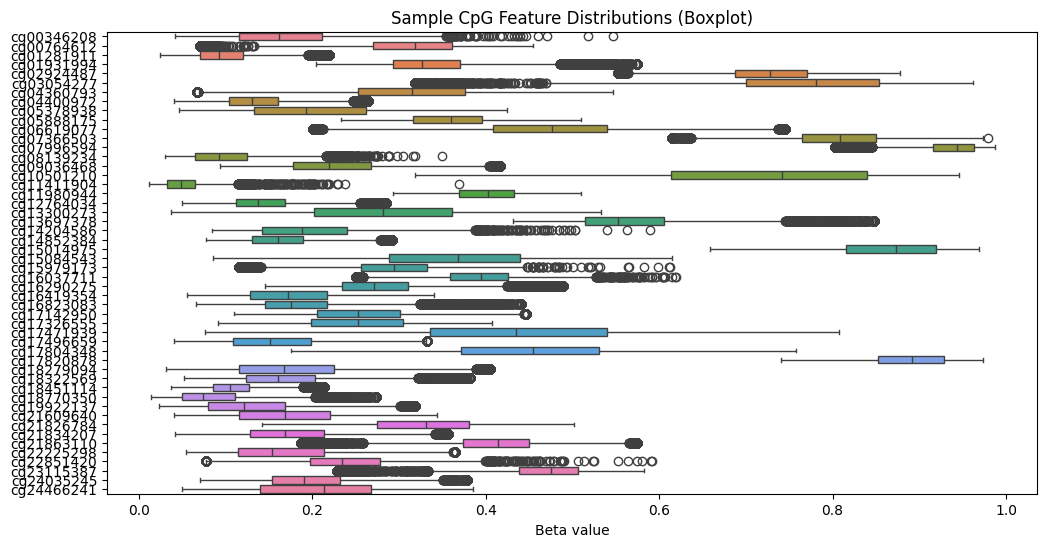

In [26]:


# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df_final["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# CpG features variability (sample 50 features for visualization)
sample_features = df_final.drop(columns=["age"]).columns[:50]
plt.figure(figsize=(12,6))
sns.boxplot(data=df_final[sample_features], orient="h")
plt.title("Sample CpG Feature Distributions (Boxplot)")
plt.xlabel("Beta value")
plt.show()


dimensionality reduction methods

SetUp

In [15]:
# Separate features and target
X = df_final.drop(columns=["age"])
y = df_final["age"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ElasticNet model
base_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Evaluation function
def evaluate_model(model, X_tr, X_te, y_tr, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    rmse = mean_squared_error(y_te, y_pred, squared=False)
    r2 = r2_score(y_te, y_pred)
    mae = mean_absolute_error(y_te, y_pred)
    return rmse, r2, mae

Separate features & target

In [16]:
X = df_final.drop(columns=["age"])
y = df_final["age"]

# Train-test split (same for all methods)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Define Gradient Boosting and evaluation function

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

In [20]:
# Gradient Boosting model
model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

def evaluate(model, X_tr, X_te, y_tr, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    # Compute RMSE manually
    rmse = np.sqrt(mean_squared_error(y_te, y_pred))
    r2 = r2_score(y_te, y_pred)
    mae = mean_absolute_error(y_te, y_pred)
    return rmse, r2, mae

Dimensionality Reduction Methods

A. Variance Threshold

In [35]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_train_var = selector.fit_transform(X_train)
X_test_var = selector.transform(X_test)

rmse_var, r2_var, mae_var = evaluate(model, X_train_var, X_test_var, y_train, y_test)
print("Variance Threshold -> RMSE:", rmse_var, "R2:", r2_var, "MAE:", mae_var)


Variance Threshold -> RMSE: 3.8484885780415863 R2: 0.9662438553937026 MAE: 2.648120992223771


In [38]:
X_train.shape

(9528, 2374)

In [39]:
X_train_var.shape

(9528, 119)

B. Correlation Filter

In [31]:
# Remove highly correlated features (>0.95)
corr_matrix = X_train.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.95)]

X_train_corr = X_train.drop(columns=to_drop)
X_test_corr = X_test.drop(columns=to_drop)

rmse_corr, r2_corr, mae_corr = evaluate(model, X_train_corr, X_test_corr, y_train, y_test)
print("Correlation Filter -> RMSE:", rmse_corr, "R2:", r2_corr, "MAE:", mae_corr)


Correlation Filter -> RMSE: 3.488246194363025 R2: 0.9722676487026123 MAE: 2.39773958855476


C. ElasticNet Selection

In [40]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import ElasticNet

selector_en = SelectFromModel(ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42))
selector_en.fit(X_train, y_train)

X_train_en = selector_en.transform(X_train)
X_test_en = selector_en.transform(X_test)

rmse_en, r2_en, mae_en = evaluate(model, X_train_en, X_test_en, y_train, y_test)
print("ElasticNet Selection -> RMSE:", rmse_en, "R2:", r2_en, "MAE:", mae_en)


ElasticNet Selection -> RMSE: 3.562979984308388 R2: 0.9710666180617245 MAE: 2.4466513566324593


D. RandomForest Selection

In [26]:
from sklearn.feature_selection import SelectFromModel


In [27]:
from sklearn.ensemble import RandomForestRegressor

selector_rf = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))
selector_rf.fit(X_train, y_train)

X_train_rf = selector_rf.transform(X_train)
X_test_rf = selector_rf.transform(X_test)

rmse_rf, r2_rf, mae_rf = evaluate(model, X_train_rf, X_test_rf, y_train, y_test)
print("RandomForest Selection -> RMSE:", rmse_rf, "R2:", r2_rf, "MAE:", mae_rf)


RandomForest Selection -> RMSE: 3.9923249870948827 R2: 0.9636734454391382 MAE: 2.780272629898736


In [28]:
X_train_rf.shape

(9528, 24)

E. PCA (95% variance)

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rmse_pca, r2_pca, mae_pca = evaluate(model, X_train_pca, X_test_pca, y_train, y_test)
print("PCA (95% variance) -> RMSE:", rmse_pca, "R2:", r2_pca, "MAE:", mae_pca)


PCA (95% variance) -> RMSE: 4.164536574896526 R2: 0.9604719130688204 MAE: 2.953912436313469


In [29]:
X_train_pca.shape

(9528, 515)

Summary Table of All Methods

Visual Comparison